# Roteiro Dirigido - Semana 1 - Michel B Fiorio

Crie um Notebook no Google Colab com o nome [ELT574 Semana 1 <Matrícula>], modificando o campo <Matrícula> pela sua matrícula do Sapiens (Exemplo: ELT574 Semana 1 12700-0). Faça a análise do dataset para que seja preparada para o ajuste de modelos de aprendizado de máquina, conforme o roteiro abaixo:

1. Que tipo de problema que o dataset pretende resolver? Qual é a variável do problema que um modelo de aprendizado de máquina pode ter como valor alvo (desejado)?
2. Quantas amostras estão presentes no dataset?
3. Quantos dados estão presentes no dataset?
4. Quais os nomes das variáveis presentes no dataset?
5. Todas as variáveis são quantitativas? Se não, qual variável é qualitativa? Ela é do tipo ordinária ou nominal?
6. As variáveis quantitativas são contínuas ou discretas?
7. Existe alguma variável com dados faltantes ou inválidos? Se sim, quantos dados estão faltando?
8. É possível transformar as variáveis qualitativas em numéricas? Como fazer isto?
9. Como as variáveis do problema se relacionam, em relação à dispersão? Alguma variável se mostra tendenciosa em relação à variável alvo?
10. Mostre que a correlação entre as variáveis do problema não explica a tendência da variável alvo. Qual a variável que tem a maior correlação linear com a variável alvo?
11. Crie uma variável relacionando duas outras variáveis do dataset, como mostrado em exemplo na aula síncrona (sugestões de variáveis: número de famílias, total de quartos e total de cômodos) e calcule o coeficiente de correlação linear entre ela e a variável alvo.
12. A variável criada possui algum grau de correlação linear relevante com a variável alvo? O que pode ser explicado por esta correlação?

### Resposta 1:

**Formulação do problema:** estimar o valor médio das casas em um distrito da Califórnia, dado um conjunto de dados e característica deste distrito.

**Variável alvo:** 'median_house_value'


In [8]:
# Criação do Setup / Bibliotecas a serem utilizadas

## OS para importar comandos de diretório
import os

## Habilitar Google Drive no Colab
from google.colab import drive
drive.mount('/content/drive')

## Numpy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Protar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Setup completo!


In [10]:
# Importar banco de dados
path = '/content/drive/MyDrive/housing.csv'
df_housing = pd.read_csv(path)

# Conhecendo o banco de dados
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Resposta 2:

**Quantas amostras presentes no dataset:** 20640


### Resposta 3:

**Quantos dados presentes no dataset:** Nove dados diferentes divididos em nove colunas.


### Resposta 4:

**Quantos os nomes das variáveis presentes no dataset:**
- longitude
- latitude
- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income
- median_house_value
- ocean_proximity

In [13]:
df_housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Resposta 5:

**Variável qualitativa nominal:** ocean_proximity

In [14]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Resposta 6:

**Variáveis quantitativas discretas:** housing_median_age, total_rooms, total_bedrooms, population, households, median_house_value.

**Variáveis quantitativas continuas:** longitude, latitude, median_income.

### Resposta 7:

**Variável com dados faltantes:** total bedrooms

**Quantidade de dados faltantes:** 207

### Resposta 8:

**Variável qualitativa transformada em array de inteiros**

In [18]:
# Usando a função OrdinalEncoder da biblioteca sklearn.preprocessing para transformar os dados categóricos em um array de inteiros.

df_housing_cat = df_housing[['ocean_proximity']] #repassa o vetor com os indices

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_housing_cat_encoded = ordinal_encoder.fit_transform(df_housing_cat)
df_housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [19]:
# As categorias ficam ordinárias
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Variável qualitativa transformada em matriz esparça**

In [20]:
# Usando a função OneHotEncoder da biblioteca sklearn.preprocessing para transformar os dados categóricos em uma matriz esparça com variáveis binárias

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df_housing_cat_1hot = cat_encoder.fit_transform(df_housing_cat)
df_housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [21]:
# Visualizado a matriz esparca

df_housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [22]:
# Categorias transformadas com o OneHotEncoder

cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Resposta 9:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ed2d49c10>,
      dtype=object)

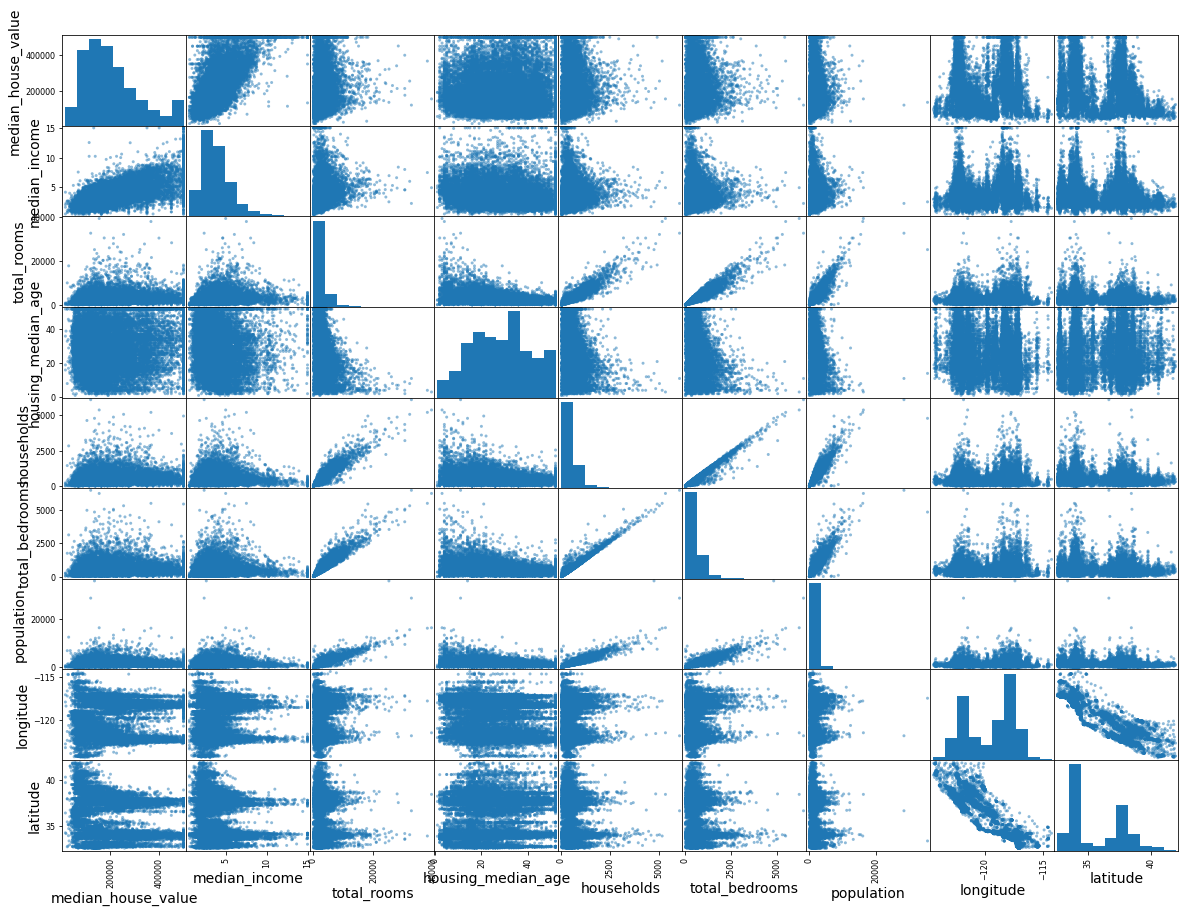

In [25]:
# Graficos de dispersao entre as variaveis
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'households', 'total_bedrooms', 'population', 'longitude', 'latitude']
scatter_matrix(df_housing[attributes],figsize=(20,15))

**Análise da Matriz de Dispersão**: pela observação das matrizes de dispersão plotadas a variável 'median_income' é a que possui uma relação linear mais clara com a variável alvo. Já para as demais variáveis fica pouco visível uma relação direta com a variável alvo, algumas inclusive mostrando relação nenhuma com a variável alvo pois os pontos estão muito dispersos na matriz. 

### Resposta 10:

In [26]:
# Matriz de correlacao

corr_matrix = df_housing.corr()

# Correlacao das entradas com a saída desejada

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

**Variável com maior correlação com a variável alvo:** pelo resultado da matriz de correlação observamos que a variável 'median_income é a que possui a maior correlação, muito superior a correlação das demais variáveis.

### Resposta 11:

**Vamos criar a seguir as seguintes novas variáveis: total_rooms/total_bedrooms e households/total_rooms.**

In [28]:
# Criando novas variaveis para analisar o problema

df_housing["rooms_per_bedrooms"] = df_housing["total_rooms"]/df_housing["total_bedrooms"]
df_housing["housesolds_per_rooms"]= df_housing["households"]/df_housing["total_rooms"]

corr_matrix = df_housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688075
rooms_per_bedrooms      0.383920
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049686
population             -0.024650
longitude              -0.045967
latitude               -0.144160
housesolds_per_rooms   -0.214654
Name: median_house_value, dtype: float64

### Resposta 12:

**Avaliação da correlação das novas variáveis com a variável alvo:** Observa-se na nova matriz de correlação que as duas variáveis criadas se tornaram as variáveis com as segunda e terceira correlações mais relevantes com a variável alvo. Dessa forma pode-se considerar a remoção das variáveis originais que criam as variáveis novas para fins de redução da dimensionalidade dos dados que treinarão o modelo, sem que seja perdido qualidade no treinamento do modelo.